#### LIBRARIES IMPORT AND PRELIMINARY DATA EXPLORATIONS

In [73]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, ElasticNet, SGDClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
# Importing Dataset

x_train_df = pd.read_csv("train.csv")

# Chose a Sample of dataset 
df = x_train_df.sample(frac=0.025,random_state=1)
#df = pd.read_csv("train.csv")

In [3]:
# Importing test dataset
x_test_df = pd.read_csv("test.csv")

df_test = x_test_df.sample(frac=0.025,random_state=1)
#df_test = pd.read_csv("test.csv")

In [4]:
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
49673,test_49673,11.1044,-6.7099,17.8710,3.2243,8.8478,-13.3124,5.7892,12.9625,-0.6813,...,5.9420,5.6437,2.2066,6.2148,21.5757,-3.0771,-4.2946,9.0310,20.9245,3.1500
171551,test_171551,5.7274,-0.4187,12.6714,7.7062,9.8400,8.3206,5.9172,14.9554,-2.4336,...,2.3589,6.6190,4.6949,0.9724,15.1168,-1.5141,9.8740,8.4839,15.3571,-12.1836
5506,test_5506,12.5517,7.9984,11.1343,7.0043,10.8234,-9.9847,5.8742,19.9514,0.5893,...,4.9495,7.2834,-0.6708,7.4930,21.1419,0.5040,-1.0404,8.3305,15.0389,7.3967
38370,test_38370,8.7687,2.2315,8.0303,5.8999,9.4847,-1.6425,4.6997,19.7067,-2.2117,...,3.7571,7.7909,2.6351,2.5489,18.8010,0.8993,-1.7393,8.9744,13.6331,3.8630
36930,test_36930,12.8101,2.6991,8.3205,10.1344,11.7683,0.0638,4.4188,15.4821,2.0414,...,13.7312,9.6981,2.4056,4.3533,12.7338,-0.6347,1.1318,7.7132,9.6437,11.8016


In [5]:
# View the data
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
49673,train_49673,0,11.5208,0.0345,13.6967,8.7980,11.4984,-14.4183,5.2356,14.6201,...,-2.5931,6.8155,4.0026,5.7603,16.7222,0.5767,-3.1717,8.9964,19.5975,-16.0881
171551,train_171551,0,10.6327,-3.0837,7.3320,8.9173,9.8485,-10.0986,5.4894,11.2602,...,7.2326,5.0710,3.4117,4.1256,19.3753,-2.2722,-2.5486,6.3672,16.0392,-0.8213
5506,train_5506,0,13.4346,-4.7138,10.2488,7.2394,11.5154,-10.7816,4.4755,16.3473,...,1.5606,14.4879,1.8716,6.0999,21.1498,3.1641,-3.9446,9.4770,17.1406,-18.9208
38370,train_38370,0,4.8650,4.3326,13.9920,6.9034,12.1384,-1.6310,5.2511,14.0651,...,-5.9529,5.7586,3.0283,-2.4441,16.7881,-0.2528,-5.1544,8.4277,12.8527,1.1520
36930,train_36930,0,9.8466,-2.0145,10.6657,4.9808,10.0866,-7.7280,4.6048,16.5240,...,-0.5729,9.0527,1.2550,-4.4527,16.0889,0.8156,4.3412,9.0945,13.4120,8.3931


In [6]:
# Identify response class imbalance
df.target.value_counts()

0    4539
1     461
Name: target, dtype: int64

In [7]:
# Get information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 49673 to 184893
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 7.7+ MB


In [8]:
# Identify if there are any null values in data

(df.isna().sum()).unique()

array([0], dtype=int64)

In [9]:
# Descriptive statistics
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.092200,10.723799,-1.601407,10.674967,6.793906,11.049505,-4.819408,5.419619,16.541580,0.240256,...,3.162564,7.432183,1.924122,3.267422,18.041109,-0.125847,2.337881,8.905262,15.900023,-3.219979
std,0.289337,3.041889,4.033928,2.622750,2.062607,1.602941,7.931624,0.869581,3.440874,3.370009,...,4.544096,3.002937,1.489051,3.983875,3.138189,1.433573,5.463942,0.924619,2.973349,10.384270
min,0.000000,1.492000,-13.422700,3.060100,0.374000,6.356000,-25.071900,2.871700,7.750900,-9.376900,...,-10.261800,-0.741500,-3.436000,-9.576600,10.133800,-4.354800,-11.691000,6.361300,7.439000,-33.962600
25%,0.000000,8.500450,-4.769050,8.670375,5.238625,9.893675,-11.032225,4.776875,13.929250,-2.411075,...,-0.117075,5.226675,0.903475,0.557050,15.698225,-1.146025,-1.892800,8.247325,13.908650,-10.939225
50%,0.000000,10.571600,-1.520650,10.541900,6.832600,11.085700,-4.440700,5.388100,16.399000,0.352200,...,3.182600,7.263200,1.880450,3.315600,18.009050,-0.151500,2.388000,8.889200,15.916150,-2.583100
75%,0.000000,12.795700,1.427500,12.517950,8.289825,12.204375,1.291475,6.035075,19.057350,2.925800,...,6.272625,9.492300,2.903800,6.097825,20.419950,0.842250,6.592950,9.590775,18.017225,4.750225
max,1.000000,19.325900,8.614600,18.201000,12.589500,15.155000,15.554300,7.813700,27.072000,9.033000,...,15.921000,16.180600,7.600200,15.209600,27.928800,3.526600,14.484700,11.832900,25.064600,22.610300


In [10]:
# Identify the dataframe shapre
df.shape

(5000, 202)

In [11]:
# Create dataframe with column name and its skewness and kurtosis

skewness = pd.DataFrame(columns=['name','value'])
sk=[]
for i in df.columns[2:]:
    #print('skewness for {} is {}'.format(i,df[i].skew()))
    s = [i,df[i].skew(),df[i].kurtosis()]
    
    sk.append(s)
    
metrics=pd.DataFrame(sk,columns=['col_name','skewness','kurtosis'])

In [12]:
metrics.skewness.sort_values(ascending=False)

179    0.269864
168    0.254884
181    0.242669
2      0.234467
163    0.228851
0      0.214211
191    0.208783
62     0.201418
41     0.195912
24     0.189726
29     0.183197
26     0.173867
89     0.173664
125    0.170257
16     0.170249
95     0.160890
25     0.157329
6      0.157214
22     0.155710
60     0.155132
177    0.146746
157    0.145869
175    0.145774
184    0.144839
18     0.136578
160    0.133627
38     0.130702
110    0.128251
7      0.123492
195    0.123137
         ...   
100   -0.100444
143   -0.105199
197   -0.105471
193   -0.107146
63    -0.108498
146   -0.112781
140   -0.116210
139   -0.127311
115   -0.134534
174   -0.136247
30    -0.139236
56    -0.152445
68    -0.153536
98    -0.158487
198   -0.159062
76    -0.160654
12    -0.164100
13    -0.165491
131   -0.166395
199   -0.173658
86    -0.175819
112   -0.177049
42    -0.177788
9     -0.190592
80    -0.197239
123   -0.217808
108   -0.233089
93    -0.268684
81    -0.275523
44    -0.356018
Name: skewness, Length: 

In [13]:
metrics['kurtosis'].sort_values(ascending=False)

179   -0.013548
44    -0.053933
192   -0.146104
81    -0.146649
93    -0.176664
198   -0.186982
62    -0.190704
86    -0.216875
105   -0.221123
146   -0.233153
110   -0.239525
29    -0.242006
124   -0.244574
26    -0.249544
193   -0.253256
168   -0.264639
11    -0.269469
106   -0.270288
0     -0.271416
172   -0.275352
31    -0.276936
181   -0.282177
133   -0.289877
38    -0.293042
148   -0.293391
50    -0.297636
95    -0.304347
76    -0.305829
67    -0.320932
25    -0.325669
         ...   
78    -0.689719
96    -0.693303
121   -0.694939
199   -0.695326
27    -0.696208
13    -0.696690
137   -0.707311
109   -0.708239
101   -0.714240
5     -0.720368
94    -0.722608
187   -0.727951
9     -0.730655
82    -0.732864
85    -0.737709
112   -0.739876
126   -0.740060
55    -0.754919
33    -0.756710
196   -0.765361
177   -0.765956
14    -0.766204
24    -0.773592
47    -0.777921
77    -0.788269
30    -0.794914
160   -0.801317
136   -0.813229
20    -0.819250
8     -0.830700
Name: kurtosis, Length: 

#### EXPLORATORY DATA ANALYSIS

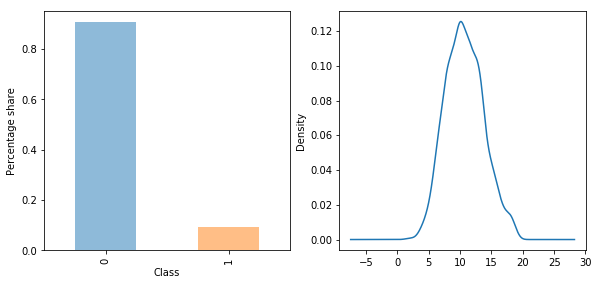

In [14]:
# View class imbalance for response class

plt.figure(figsize=(15,15))

plt.subplot2grid((3,3),(0,0))
df.target.value_counts(normalize=True).plot(kind='bar',alpha=0.5)
plt.xlabel("Class")
plt.ylabel("Percentage share")

plt.subplot2grid((3,3),(0,1))
df.var_0.plot(kind='kde')



C:\Users\errit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


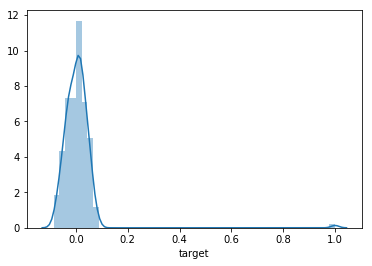

In [15]:
# Identifying correlations
corr = df.corr()

sns.distplot(corr['target'].sort_values())


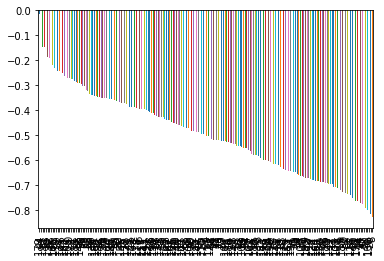

In [16]:
metrics['kurtosis'].sort_values(ascending=False).plot(kind='bar')

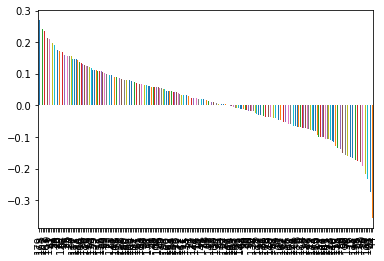

In [17]:
metrics['skewness'].sort_values(ascending=False).plot(kind='bar')

In [18]:
# Training data set split for Model Building

x_train = df.drop(columns=['target','ID_code'],axis=0)
y_train = df[['target']]

### LOGISTIC REGRESSION WITH BALANCED CLASS WEIGHT

In [19]:
# Scaling the predictors for regularization

from sklearn.preprocessing import StandardScaler

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(x_train)


###### L2 Regularization 
###### Class weight as there is a class imbalance
###### Cross Validation to select the value of regularization hyperparameter

In [20]:
#lr_classifier = LogisticRegression(penalty='l2',C=1,class_weight='balanced')
lr_classifier = LogisticRegression(penalty='l2',C=1,class_weight='balanced')
lr_model = lr_classifier.fit(X_train_std,y_train)

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
x_test = df_test.drop(columns=['ID_code'],axis=0)
x_test.shape


(5000, 200)

In [22]:
lr_pred = lr_model.predict(X_train_std)

In [23]:
confusion_matrix(y_train,lr_pred)

array([[3705,  834],
       [  71,  390]], dtype=int64)

In [24]:
accuracy_score(y_train,lr_pred)

0.819

In [25]:
print(classification_report(y_train,lr_pred))

             precision    recall  f1-score   support

          0       0.98      0.82      0.89      4539
          1       0.32      0.85      0.46       461

avg / total       0.92      0.82      0.85      5000



In [26]:
cv = cross_val_score(lr_model,X_train_std,y_train,cv=10)

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [27]:
cv

array([0.78243513, 0.812     , 0.774     , 0.824     , 0.77      ,
       0.816     , 0.824     , 0.786     , 0.788     , 0.79158317])

In [28]:
cv.mean()

0.7968018296073184

In [29]:
# Regularization - l1,l2, Elastinet
# Class Weight
# Stratified KFold
# Cross validation estimating regularization parameters
# Logistic regression - ROC , AUC and looking at Classification report

###### L1 Regularization 
###### Class weight as there is a class imbalance
###### Cross Validation to select the value of regularization hyperparameter

In [30]:
#lr_classifier = LogisticRegression(penalty='l2',C=1,class_weight='balanced')
l1_lr_classifier = LogisticRegression(penalty='l1',C=1,class_weight='balanced')
l1_lr_model = l1_lr_classifier.fit(X_train_std,y_train)

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
l1_lr_pred = l1_lr_model.predict(X_train_std)

In [32]:
confusion_matrix(y_train,l1_lr_pred)

array([[3706,  833],
       [  72,  389]], dtype=int64)

In [33]:
accuracy_score(y_train,l1_lr_pred)

0.819

In [34]:
print(classification_report(y_train,l1_lr_pred))

             precision    recall  f1-score   support

          0       0.98      0.82      0.89      4539
          1       0.32      0.84      0.46       461

avg / total       0.92      0.82      0.85      5000



In [35]:
cv = cross_val_score(l1_lr_model,X_train_std,y_train,cv=10)

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [36]:
cv

array([0.78842315, 0.812     , 0.778     , 0.824     , 0.77      ,
       0.818     , 0.826     , 0.786     , 0.786     , 0.79158317])

In [37]:
cv.mean()

0.7980006320025279

###### Using Gradient Descent to minimize the loss function
###### Class weight as there is a class imbalance
###### Cross Validation to select the value of regularization hyperparameter

In [38]:
sgd_classifier = SGDClassifier(loss = 'log',penalty='l2',alpha=.001,class_weight='balanced')
sgd_model = sgd_classifier.fit(X_train_std,y_train)

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
sgd_pred = sgd_model.predict(X_train_std)

In [40]:
sgd_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [41]:
confusion_matrix(y_train,sgd_pred)

array([[3385, 1154],
       [  99,  362]], dtype=int64)

In [42]:
accuracy_score(y_train,sgd_pred)

0.7494

In [43]:
print(classification_report(y_train,sgd_pred))

             precision    recall  f1-score   support

          0       0.97      0.75      0.84      4539
          1       0.24      0.79      0.37       461

avg / total       0.90      0.75      0.80      5000



In [54]:
cv = cross_val_score(sgd_model,X_train_std,y_train,cv=10)

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset,

In [55]:
cv.mean()

0.7575977975911904

#### DECISION TREES

In [56]:
dt_classifier = DecisionTreeClassifier(max_depth=8,class_weight='balanced')
dt_model = dt_classifier.fit(x_train,y_train)

In [57]:
dt_pred = dt_model.predict(x_train)

In [58]:
confusion_matrix(y_train,dt_pred)

array([[3756,  783],
       [  98,  363]], dtype=int64)

In [59]:
accuracy_score(y_train,dt_pred)

0.8238

In [60]:
print(classification_report(y_train,dt_pred))

             precision    recall  f1-score   support

          0       0.97      0.83      0.90      4539
          1       0.32      0.79      0.45       461

avg / total       0.91      0.82      0.85      5000



In [61]:
cv = cross_val_score(dt_model,x_train,y_train,cv=10)

In [51]:
cv

array([0.73253493, 0.718     , 0.75      , 0.658     , 0.708     ,
       0.694     , 0.794     , 0.668     , 0.66      , 0.70140281])

In [52]:
cv.mean()

0.7083937735750944

In [53]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dt_model, out_file=None, 
                      filled=True, rounded=True,  
                      special_characters=True)  

graph = graphviz.Source(dot_data) 
graph.render("dt_santander")

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
graph

In [62]:
# BAGGING

bg_classifier = BaggingClassifier()
bg_model = bg_classifier.fit(x_train,y_train)



C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
bg_pred = bg_model.predict(x_train)

In [64]:
accuracy_score(y_train,bg_pred)

0.9862

In [65]:
confusion_matrix(y_train,bg_pred)

array([[4539,    0],
       [  69,  392]], dtype=int64)

In [66]:
print(classification_report(y_train,bg_pred))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      4539
          1       1.00      0.85      0.92       461

avg / total       0.99      0.99      0.99      5000



In [67]:
cv = cross_val_score(bg_model,x_train,y_train,cv=10)

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [68]:
cv.mean()

0.9083999247996992

###### Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=5,class_weight='balanced')
rf_model = rf_classifier.fit(x_train,y_train)

In [ ]:
rf_pred = rf_model.predict(x_train)

In [ ]:
accuracy_score(y_train,rf_pred)

In [ ]:
confusion_matrix(y_train,rf_pred)

In [ ]:
print(classification_report(y_train,rf_pred))

In [ ]:
cv = cross_val_score(rf_model,x_train,y_train,cv=10)

In [ ]:
cv.mean()

###### Boosting

In [ ]:
# XGBOOST
! pip install xgboost


In [ ]:
! pip install --upgrade xgboost

In [ ]:
ratio = y_train.target.value_counts(normalize=True)[0]
ratio
xgb_classifier = XGBClassifier(scale_pos_weight=ratio, n_estimators=300)
xgb_model = xgb_classifier.fit(x_train,y_train)

In [ ]:
xgb_pred = xgb_model.predict(x_train)

In [ ]:
confusion_matrix(y_train,xgb_pred)

In [ ]:
accuracy_score(y_train,xgb_pred)

In [ ]:
print(classification_report(y_train,xgb_pred))

In [ ]:
cv = cross_val_score(xgb_model,x_train,y_train,cv =10)

In [ ]:
cv.mean()

In [ ]:
# Gradient Boosting Method

gbm_classifier = GradientBoostingClassifier(n_estimators=200)
gbm_model = gbm_classifier.fit(x_train,y_train)


In [ ]:
gbm_pred = gbm_model.predict(x_train)

In [ ]:
confusion_matrix(y_train,gbm_pred)

In [ ]:
accuracy_score(y_train,gbm_pred)

In [ ]:
print(classification_report(y_train,gbm_pred))

In [ ]:
cv = cross_val_score(gbm_model,x_train,y_train,cv =10)

In [ ]:
cv.mean()

In [ ]:
imp_feats = gbm_model.feature_importances_
imp_feats = pd.Series(imp_feats)
#imp_feats.append(df.columns[2:])
#df.columns[2:]
var_imp = {'colnames': df.columns[2:],'relative_importance': imp_feats}
var_imp = pd.DataFrame(var_imp)
#pd.DataFrame([(df.columns[2:]),imp_feats],columns=['colnames','relative_importance'])
var_imp = var_imp.sort_values(by= 'relative_importance' ,ascending=False).head(50)


In [ ]:
#plt.figure(figsize=(50,50))
#sns.barplot(y = 'colnames',x='relative_importance',data=var_imp)
#plt.xscale('linear')
sns.factorplot(x='relative_importance', y='colnames', size=20,aspect=.6,kind='bar', data=var_imp)



In [ ]:
# ADABOOST Classifier

ada_classifier = AdaBoostClassifier(n_estimators = 100)
ada_model = ada_classifier.fit(x_train,y_train)


In [ ]:
ada_pred = ada_model.predict(x_train)

In [ ]:
confusion_matrix(y_train,ada_pred)

In [ ]:
accuracy_score(y_train,ada_pred)

In [ ]:
print(classification_report(y_train,ada_pred))

In [ ]:
cv = cross_val_score(ada_model,x_train,y_train,cv =10)

In [ ]:
cv.mean()

In [ ]:
# Try LGBM with original dataset which should be used with large datasets only as it is sensitive to overfitting the smaller dataset 

###### K NEAREST NEIGHBOUR

In [88]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_model = knn_classifier.fit(x_train,y_train)

C:\Users\errit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [89]:
knn_pred = knn_model.predict(x_train)

In [90]:
confusion_matrix(y_train,knn_pred)

array([[4532,    7],
       [ 392,   69]], dtype=int64)

In [91]:
accuracy_score(y_train,knn_pred)

0.9202

In [92]:
print(classification_report(y_train,knn_pred))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96      4539
          1       0.91      0.15      0.26       461

avg / total       0.92      0.92      0.89      5000



In [81]:
cv = cross_val_score(knn_model,x_train,y_train,cv =10)

C:\Users\errit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\errit\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

In [82]:
cv.mean()

0.9074007248028991

In [ ]:
folds = StratifiedKFold(n_splits=9, shuffle=True, random_state=31415)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(x_train.values, y_train.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 15000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 250)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))